In [ ]:
'''
GE 3D Print Inteligence
NDA Protected Data
'''

'\nGE 3D Print Inteligence\nNDA Protected Data\n'

In [ ]:
'''
# area features 
# based on github project by
# https://github.com/dnstanciu/pool-tracker-pro
# which has MIT License: 
#  Commercial use
#  Modification
#  Distribution
#  Private use
'''

'\n# based on github project by\n# https://github.com/dnstanciu/pool-tracker-pro\n# which has MIT License: \n#  Commercial use\n#  Modification\n#  Distribution\n#  Private use\n'

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from imutils import contours
import imutils
import glob
import os
import pandas as pd
import decimal
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})
# !pip3 install npTdms
# from nptdms import TdmsFile

# to display images
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (40,6)

In [ ]:
from datetime import date

In [ ]:
'''
Part 1: Load the files from a private Google Drive
'''

# https://colab.research.google.com/drive/1srw_HFWQ2SMgmWIawucXfusGzrj1_U0q
# this loads can lodes the files directly, so its way faster
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# VIDEO 1
video_file_path = '/content/drive/My Drive/COURSES/DATA_X_2020_2/GE/data/2020-02-18 17.20.17.799283-00181.avi'
tdms_file_path = '/content/drive/My Drive/COURSES/DATA_X_2020_2/GE/data/182_tdms_data_v2.csv'

video_file_path = '/content/drive/My Drive/COURSES/DATA_X_2020_2/GE/data/2020-02-18 16.57.37.228622-00161.avi'
tdms_file_path = '/content/drive/My Drive/COURSES/DATA_X_2020_2/GE/data/162_tdms_data_v2.csv'
# load the tdms 
df_tdms = pd.read_csv(tdms_file_path)
print(df_tdms.head())
cap = cv2.VideoCapture(video_file_path)
print('Frames of video {}'.format(str(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))))
# Start Frame is the first frame extracted from pre procesed tdms data
print('Start Frame tdms {}'.format(str(df_tdms['Frame_Index'].min())))
print('End Frame tdms {}'.format(str(df_tdms['Frame_Index'].max())))

   Frame_Index  Layer      x     y  ...  change_bool  LineIndex  LineID  BlockID
0       611889    162  17475 -6823  ...            1       5416      33       14
1       611890    162  17492 -6803  ...            0       5416      33       14
2       611891    162  17489 -6808  ...            0       5416      33       14
3       611892    162  17469 -6839  ...            0       5416      33       14
4       611893    162  17460 -6865  ...            0       5416      33       14

[5 rows x 10 columns]
Frames of video 671344
Start Frame tdms 611889
End Frame tdms 665391


# Feature Calculation

In [ ]:
'''
Part 2 : Input parameters and variables to store data
'''
results_output_path = "./out/"

# values to crop the images
[start_y,end_y, start_x,end_x] = [10,60,10,60]

# labels of the expracted features, extracted for a set of thresholds
base_columns=['Area_countour','Area_npixels', 'Mean', 'Sum', 'Radius'
, 'Rotated_Box','Rotated_Box_side1','Rotated_Box_side2','Rotated_Box_area','Rotated_Box_angle'
, 'Rotated_Box_center_row', 'Rotated_Box_center_col'
,'Ellipse_axis1','Ellipse_axis2','Ellipse_area','Ellipse_angle'
,'Ellipse_center_row','Ellipse_center_col'
,'Ratio_Area_npixels_rect','Ratio_Area_npixels_circle','Ratio_Area_npixels_ellipse']

# values if frame is blank
default_values = []

# number of features per threshold
n_features = len(base_columns)
for i in range(n_features):
    default_values.append(-1)
print('n_features: {}'.format(n_features))

# labels of all features (base_columns for every threshold)
columns = []
threslholds = [5*(i+1) for i in range(14)]
for threslhold in threslholds:
    columns += [i + '_' + str(threslhold) for i in base_columns]

# empty dataframe with FrameIndex column + labels
df_columns = ['Frame_Index']
df_columns+=columns
df = pd.DataFrame(columns=df_columns)
df

n_features: 21


,Frame_Index,Area_countour_5,Area_npixels_5,Mean_5,Sum_5,Radius_5,Rotated_Box_5,Rotated_Box_side1_5,Rotated_Box_side2_5,Rotated_Box_area_5,Rotated_Box_angle_5,Rotated_Box_center_row_5,Rotated_Box_center_col_5,Ellipse_axis1_5,Ellipse_axis2_5,Ellipse_area_5,Ellipse_angle_5,Ellipse_center_row_5,Ellipse_center_col_5,Ratio_Area_npixels_rect_5,Ratio_Area_npixels_circle_5,Ratio_Area_npixels_ellipse_5,Area_countour_10,Area_npixels_10,Mean_10,Sum_10,Radius_10,Rotated_Box_10,Rotated_Box_side1_10,Rotated_Box_side2_10,Rotated_Box_area_10,Rotated_Box_angle_10,Rotated_Box_center_row_10,Rotated_Box_center_col_10,Ellipse_axis1_10,Ellipse_axis2_10,Ellipse_area_10,Ellipse_angle_10,Ellipse_center_row_10,Ellipse_center_col_10,...,Mean_65,Sum_65,Radius_65,Rotated_Box_65,Rotated_Box_side1_65,Rotated_Box_side2_65,Rotated_Box_area_65,Rotated_Box_angle_65,Rotated_Box_center_row_65,Rotated_Box_center_col_65,Ellipse_axis1_65,Ellipse_axis2_65,Ellipse_area_65,Ellipse_angle_65,Ellipse_center_row_65,Ellipse_center_col_65,Ratio_Area_npixels_rect_65,Ratio_Area_npixels_circle_65,Ratio_Area_npixels_ellipse_65,Area_countour_70,Area_npixels_70,Mean_70,Sum_70,Radius_70,Rotated_Box_70,Rotated_Box_side1_70,Rotated_Box_side2_70,Rotated_Box_area_70,Rotated_Box_angle_70,Rotated_Box_center_row_70,Rotated_Box_center_col_70,Ellipse_axis1_70,Ellipse_axis2_70,Ellipse_area_70,Ellipse_angle_70,Ellipse_center_row_70,Ellipse_center_col_70,Ratio_Area_npixels_rect_70,Ratio_Area_npixels_circle_70,Ratio_Area_npixels_ellipse_70


# Functions

In [ ]:
'''
We define some relevant functions
'''

In [ ]:
def show_image(build_area_roi):
    imgplot = plt.imshow(build_area_roi)
    plt.show()
    return ''

In [ ]:
'''
function to save the google colab results to a csv. 
Used to continually save the results of the frame features
'''
def save_df(df,layer,date,frame_index):
    results_output_path = '/content/drive/My Drive/COURSES/DATA_X_2020_2/GE/data/out/'
    filename = 'frames_tdms_{}_{}_ellipse_ratios_{}.csv'.format(layer,date,frame_index)
    file_path = results_output_path + filename
    # df.to_csv(file_path, index = False) 
    df.to_csv(file_path) 
    print(filename + ' exported')
    return

In [ ]:
from scipy.spatial import distance

'''
closest point to a node, used to calculate the side of a rectangle
'''
def closest_node(node, nodes):
    closest_index = distance.cdist([node], nodes).argmin()
    return nodes[closest_index]

# Demo Calculation

In [1]:
'''
Load one frame and calculate their features
'''

'\nLoad one frame and calculate their features\n'

In [ ]:
# show frames
layer_id = 182
if(layer_id==182):
    video_file_path = '/content/drive/My Drive/COURSES/DATA_X_2020_2/GE/data/2020-02-18 17.20.17.799283-00181.avi'
    START_FRAME = 288228-1
    END_FRAME = 317918
elif(layer_id==162):
    video_file_path = '/content/drive/My Drive/COURSES/DATA_X_2020_2/GE/data/2020-02-18 16.57.37.228622-00161.avi'
    START_FRAME = 612251
    END_FRAME = 665391

# todays date, to use in the filename export
today_str = date.today().strftime("%d_%b")

# load video
cap = cv2.VideoCapture(video_file_path)
print('Frames of video {}'.format(str(int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))))

frame_index = -1
while cap.isOpened():
    # get next frame
    ret_val, image = cap.read()
    frame_index +=1
    # Every 1000 frames output a message
    if frame_index % 100 == 0:
        print("Processing frame " + str(frame_index))
    
    # skip the frames before START_FRAME
    if(frame_index < START_FRAME):
        continue
    # end on START_FRAME
    if(frame_index >= START_FRAME):
        break

Frames of video 671344
Processing frame 0
Processing frame 100
Processing frame 200
Processing frame 300
Processing frame 400
Processing frame 500
Processing frame 600
Processing frame 700
Processing frame 800
Processing frame 900
Processing frame 1000
Processing frame 1100
Processing frame 1200
Processing frame 1300
Processing frame 1400
Processing frame 1500
Processing frame 1600
Processing frame 1700
Processing frame 1800
Processing frame 1900
Processing frame 2000
Processing frame 2100
Processing frame 2200
Processing frame 2300
Processing frame 2400
Processing frame 2500
Processing frame 2600
Processing frame 2700
Processing frame 2800
Processing frame 2900
Processing frame 3000
Processing frame 3100
Processing frame 3200
Processing frame 3300
Processing frame 3400
Processing frame 3500
Processing frame 3600
Processing frame 3700
Processing frame 3800
Processing frame 3900
Processing frame 4000
Processing frame 4100
Processing frame 4200
Processing frame 4300
Processing frame 4400

KeyboardInterrupt: ignored

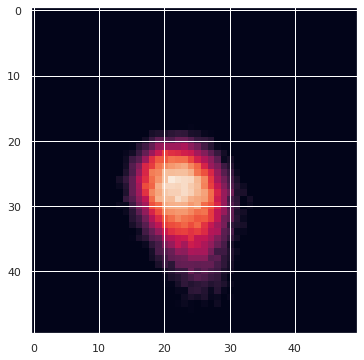

23.198389053344727 30.673095703125 17.923067092895508 17.923067092895508 165.69448852539062


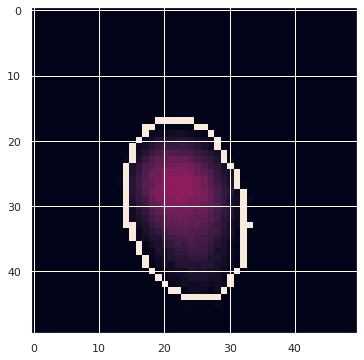

In [ ]:
# crop omage
build_area_roi = image[start_y:end_y, start_x:end_x]

# image to rgb
build_area_roi = cv2.cvtColor(build_area_roi, cv2.COLOR_BGR2GRAY)

# see the image
show_image(build_area_roi)

# in this  demo, we dont threshold the image
thresh = build_area_roi

# extract image countour, used to adjust shapes to this contour
cnts = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

# if there is an area
if len(cnts) != 0:
    sorted_contours = sorted(cnts, key=cv2.contourArea, reverse=True)
    # Get top 2 contours (2nd largest if available) and combine their points to get encompassing rectangle.
    largest_contour = sorted_contours[0]
    top_contour_points = largest_contour
    ellipse = cv2.fitEllipse(largest_contour)
    (xc,yc),(d1,d2),angle = ellipse
    print(xc,yc,d1,d1,angle)
    cv2.ellipse(thresh, ellipse, (255, 255, 0), 1)
    area = (np.pi*d1*d2/4)
    area = np.round(area,1)
    print(area)
    show_image(thresh)

# All frames

In [2]:
'''
Part 3: Calculatefeatures for all frames
'''

'\nPart 3: Calculatefeatures for all frames\n'

In [ ]:
'''
we iterate over all frames and get the area, pixel features of the meltpool
'''
layer_id = 182

if(layer_id==182):
    video_file_path = '/content/drive/My Drive/COURSES/DATA_X_2020_2/GE/data/2020-02-18 17.20.17.799283-00181.avi'
    START_FRAME = 288228-1
    END_FRAME = 317918
elif(layer_id==162):
    video_file_path = '/content/drive/My Drive/COURSES/DATA_X_2020_2/GE/data/2020-02-18 16.57.37.228622-00161.avi'
    START_FRAME = 612251
    END_FRAME = 665391

cap = cv2.VideoCapture(video_file_path)
today_str = date.today().strftime("%d_%b")
frame_index = -1
while cap.isOpened():
    frame_index+=1
    ret_val, image = cap.read()

    # Every 1000 frames output a message
    if frame_index % 100 == 0:
        print("Processing frame " + str(frame_index))

    # skip the frames before START_FRAME
    if(frame_index < START_FRAME):
        continue

    # every 10.000 frames calculated, export df to csv
    if frame_index % 10000 == 0:
        # save df and generate an empty one
        save_df(df,layer_id,today_str,frame_index)
        df = pd.DataFrame(columns=df_columns)
      
    # if got to end frame, save and exit
    if frame_index > END_FRAME:
        save_df(df,layer_id,today_str,frame_index)
        df = pd.DataFrame(columns=df_columns)
        break
    
    # save frame index
    df.loc[frame_index,'Frame_Index'] = frame_index
    # print('Iterating over frame index: {}'.format(frame_index))
    
    # iterate over threslhold parameters
    # print('frame: {} thres'.format(str(frame_index)))
    
    # iterate over all thresholds, one by one
    for i in range(len(threslholds)):
    # for i in range(1):
        threshold = threslholds[i]
        
        if image is None:
            break    
        
        # crop the image
        build_area_roi = image[start_y:end_y, start_x:end_x]
        
        # image to rgb
        build_area_roi = cv2.cvtColor(build_area_roi, cv2.COLOR_BGR2GRAY)

        # show_image(build_area_roi)

        # Blur to remove noise (radius must be ODD)
        blur = cv2.GaussianBlur(build_area_roi, (5, 5), 0)
        # show_image(blur)

        # Threshold the image to reveal light regions in the blurred image.
        thresh = cv2.threshold(blur, threshold, 255, cv2.THRESH_BINARY)[1]
        thresh_keep_gray = cv2.threshold(blur, threshold, 255, cv2.THRESH_TOZERO)[1]     
        

        # Perform a series of erosions and dilations to remove
        # any small blobs of noise from the thresholded image.
        thresh = cv2.erode(thresh, None, iterations=1)
        thresh = cv2.dilate(thresh, None, iterations=1)


        # Get contours.
        cnts = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        # print(cnts)

        # if there is countour (image is not black)
        if len(cnts) != 0:
            
            sorted_contours = sorted(cnts, key=cv2.contourArea, reverse=True)

            # Get top 2 contours (2nd largest if available) and combine their points to get encompassing rectangle.
            largest_contour = sorted_contours[0]
            top_contour_points = largest_contour

            # Get area of melt pool (largest available).
            area = cv2.contourArea(largest_contour)

            # Get average intensity of melt pool.
            contour_mask = np.zeros(build_area_roi.shape, np.uint8)
            cv2.drawContours(contour_mask, top_contour_points, -1, 255, -1) # Draw filled contours.

            sum_melt_pool_original = np.sum(thresh_keep_gray)
            n_pixels_threshold = np.sum(thresh)/255
            # show_image(thresh_keep_gray)
            
            mean = sum_melt_pool_original/n_pixels_threshold
            mean = np.round(mean,1)

            # Get radius of minimum enclosing circle of contour(s).
            ((cX, cY), radius) = cv2.minEnclosingCircle(top_contour_points)
            radius = np.round(radius,1)

            # Find rotated rectangle of encompassing contours. 
            rotated_rectangle = cv2.minAreaRect(top_contour_points)
            rotated_box = cv2.boxPoints(rotated_rectangle)
            rotated_box = np.int0(rotated_box)

            x0,y0 = rotated_box[0]
            x1,y1 = rotated_box[1]
            x2,y2 = rotated_box[2]
            x3,y3 = rotated_box[3]

            node1 = rotated_box[0]
            node2 = closest_node(rotated_box[0], rotated_box[1:])
            
            # get orientation
            side = node2 - node1
            angle = np.arctan(side[1]/side[0]) # in rad
            angle_rect = np.degrees(angle) # in deg
            angle_rect = np.round(angle_rect,1)

            # rectangle centroid
            center_rect = (0.25*(x0+x1+x2+x3),0.25*(y0+y1+y2+y3))
            center_rect_row,center_rect_col = center_rect           
            center_rect_row,center_rect_col = np.round(center_rect_row,1),np.round(center_rect_col,1)


            # length of rectanlge sides
            dist1 = np.round(np.linalg.norm(rotated_box[0]-rotated_box[1]),1)
            dist2 = np.round(np.linalg.norm(rotated_box[0]-rotated_box[2]),1)
            dist3 = np.round(np.linalg.norm(rotated_box[0]-rotated_box[3]),1)
            
            bbox_side1, bbox_side2 = np.partition(np.array([dist1,dist2,dist3]), 1)[0:2]
            bbox_area = np.round(bbox_side1*bbox_side2,1) # rect area

            try:
                # try to fir an ellipse
                ellipse = cv2.fitEllipse(largest_contour)
                (xc,yc),(d1,d2),angle_ellipse = ellipse
                xc = np.round(xc,1)
                yc = np.round(yc,1)
                d1 = np.round(d1,1)
                d2 = np.round(d2,1)
                angle_ellipse = np.round(angle_ellipse,1)
                area_ellipse = np.round(np.pi*d1*d2/4,1)
            except:
                # if not ellipse, default values
                (xc,yc),(d1,d2),angle = (-1,-1),(-1,-1),-1

            if(bbox_area>0):
                # ratios
                Ratio_Area_npixels_rect = bbox_area/n_pixels_threshold
                Ratio_Area_npixels_rect = np.round(Ratio_Area_npixels_rect,2)
            else:
                Ratio_Area_npixels_rect = -1

            if(radius>0):
                Ratio_Area_npixels_circle = np.pi*np.power(radius,2)/n_pixels_threshold
                Ratio_Area_npixels_circle = np.round(Ratio_Area_npixels_circle,2)
            else:
                Ratio_Area_npixels_circle = -1

            if(area_ellipse>0):
                Ratio_Area_npixels_ellipse = area_ellipse/n_pixels_threshold
                Ratio_Area_npixels_ellipse = np.round(Ratio_Area_npixels_ellipse,2)
            else:
                Ratio_Area_npixels_ellipse = -1
            
            # save all the features for the threshold
            df.loc[frame_index,columns[n_features*(i):n_features*(i+1)]] = [area,n_pixels_threshold,mean,sum_melt_pool_original,radius
                                                          ,rotated_box,bbox_side1, bbox_side2,bbox_area,angle_rect
                                                          ,center_rect_row,center_rect_col
                                                          ,d1,d2,area_ellipse,angle_ellipse
                                                          ,yc,xc
                                                          ,Ratio_Area_npixels_rect,Ratio_Area_npixels_circle,Ratio_Area_npixels_ellipse]
            #  show whats happening
            # print(38*'-')
            # print('final results')
            # print([area,n_pixels_threshold,mean,sum_melt_pool_original,radius
            #                                               ,rotated_box,bbox_side1, bbox_side2,bbox_area,angle_rect
            #                                               ,center_rect_row,center_rect_col
            #                                               ,d1,d2,area_ellipse,angle_ellipse
            #                                               ,yc,xc
            #                                               ,Ratio_Area_npixels_rect,Ratio_Area_npixels_circle,Ratio_Area_npixels_ellipse])
            # print('angle rect: {}'.format(angle_rect))            
            # print('angle ellipse: {}'.format(angle_ellipse))            
            # print('ratios ')
            # print([Ratio_Area_npixels_rect,Ratio_Area_npixels_circle,Ratio_Area_npixels_ellipse])

        else:
            # if not area, save default -1 values
            df.loc[frame_index,columns[n_features*(i):n_features*(i+1)]] = default_values

Processing frame 0
Processing frame 100
Processing frame 200
Processing frame 300
Processing frame 400
Processing frame 500
Processing frame 600
Processing frame 700
Processing frame 800
Processing frame 900
Processing frame 1000
Processing frame 1100
Processing frame 1200
Processing frame 1300
Processing frame 1400
Processing frame 1500
Processing frame 1600
Processing frame 1700
Processing frame 1800
Processing frame 1900
Processing frame 2000
Processing frame 2100
Processing frame 2200
Processing frame 2300
Processing frame 2400
Processing frame 2500
Processing frame 2600
Processing frame 2700
Processing frame 2800
Processing frame 2900
Processing frame 3000
Processing frame 3100
Processing frame 3200
Processing frame 3300
Processing frame 3400
Processing frame 3500
Processing frame 3600
Processing frame 3700
Processing frame 3800
Processing frame 3900
Processing frame 4000
Processing frame 4100
Processing frame 4200
Processing frame 4300
Processing frame 4400
Processing frame 4500


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:129: RuntimeWarning: divide by zero encountered in long_scalars


Processing frame 288300
Processing frame 288400
Processing frame 288500
Processing frame 288600
Processing frame 288700
Processing frame 288800
Processing frame 288900
Processing frame 289000
Processing frame 289100
Processing frame 289200
Processing frame 289300
Processing frame 289400
Processing frame 289500
Processing frame 289600
Processing frame 289700
Processing frame 289800
Processing frame 289900
Processing frame 290000
frames_tdms_182_03_Dec_ellipse_ratios_290000.csv exported
Processing frame 290100
Processing frame 290200
Processing frame 290300
Processing frame 290400
Processing frame 290500
Processing frame 290600
Processing frame 290700
Processing frame 290800
Processing frame 290900
Processing frame 291000
Processing frame 291100
Processing frame 291200
Processing frame 291300
Processing frame 291400
Processing frame 291500
Processing frame 291600
Processing frame 291700
Processing frame 291800
Processing frame 291900
Processing frame 292000
Processing frame 292100
Proces